In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from deap import base, creator, tools, algorithms
import random
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pygad
import torch


In [2]:
file_path = 'dataset/cardio_train.csv'

df = pd.read_csv(file_path, sep=';')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
columns = df.columns.drop('cardio')
print(columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active'],
      dtype='object')


In [5]:
# replace age in days to age in years

df['age'] = df['age'] / 365
df['age'] = df['age'].astype(int)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

<Axes: ylabel='count'>

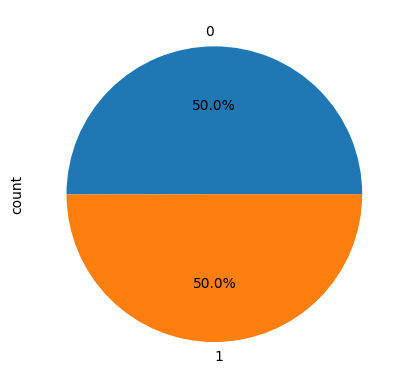

In [8]:
df['cardio'].value_counts().plot.pie(autopct='%1.1f%%')


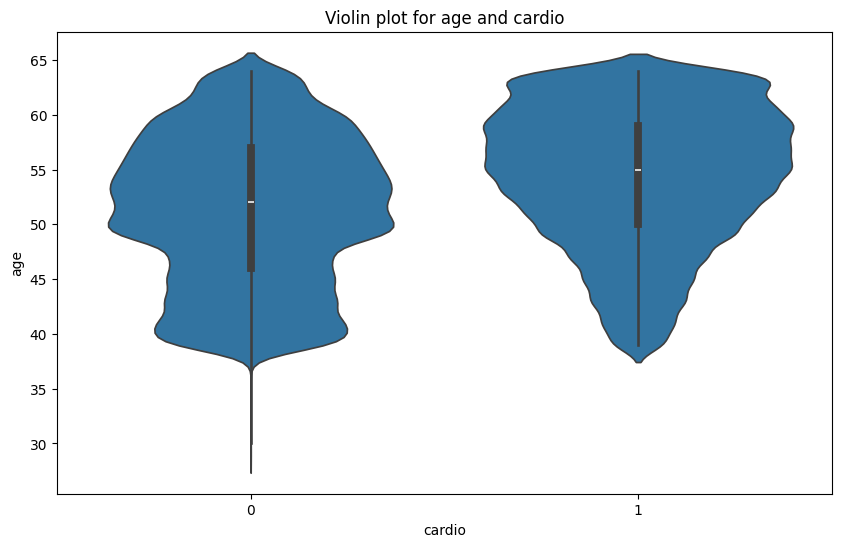

In [9]:
# violin plot for age and cardio

plt.figure(figsize=(10, 6))

sns.violinplot(x='cardio', y='age', data=df)

plt.title('Violin plot for age and cardio')

plt.show()

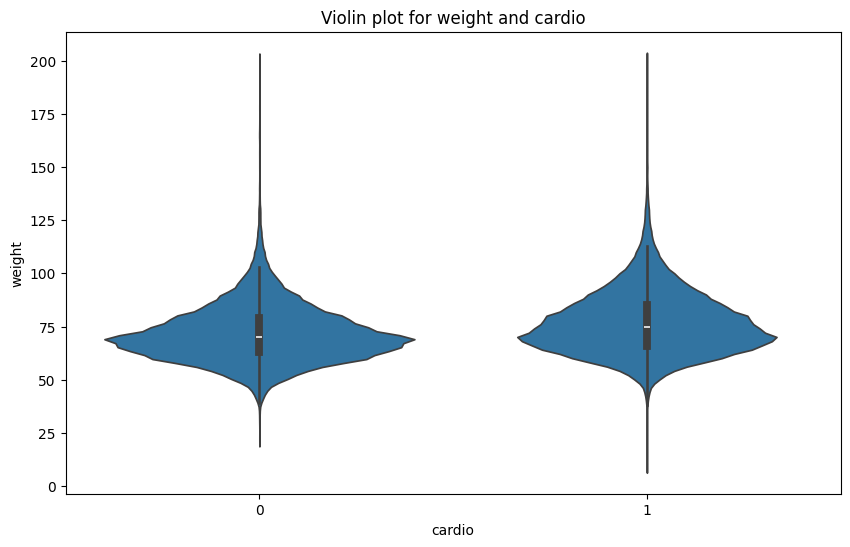

In [10]:
# violin plot for with and cardio

plt.figure(figsize=(10, 6))

sns.violinplot(x='cardio', y='weight', data=df)

plt.title('Violin plot for weight and cardio')

plt.show()


<Axes: xlabel='gender', ylabel='count'>

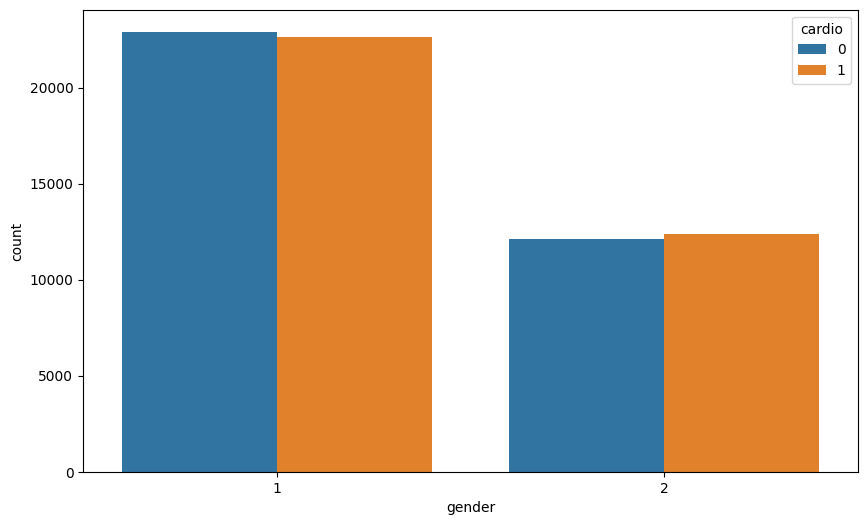

In [11]:
# count of male and female cardio patients

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='cardio', data=df)

<Axes: xlabel='smoke', ylabel='count'>

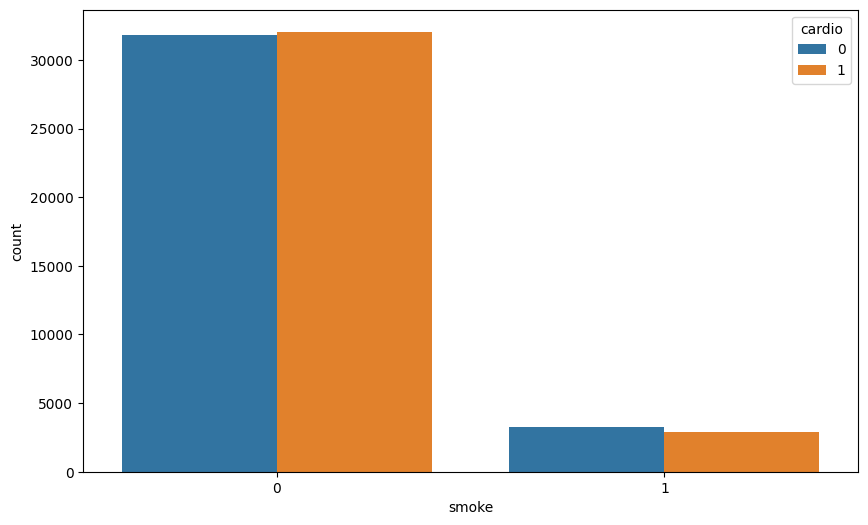

In [12]:
# count of non-smokers and smokers cardio patients

plt.figure(figsize=(10, 6))

sns.countplot(x='smoke', hue='cardio', data=df)

<Axes: xlabel='alco', ylabel='count'>

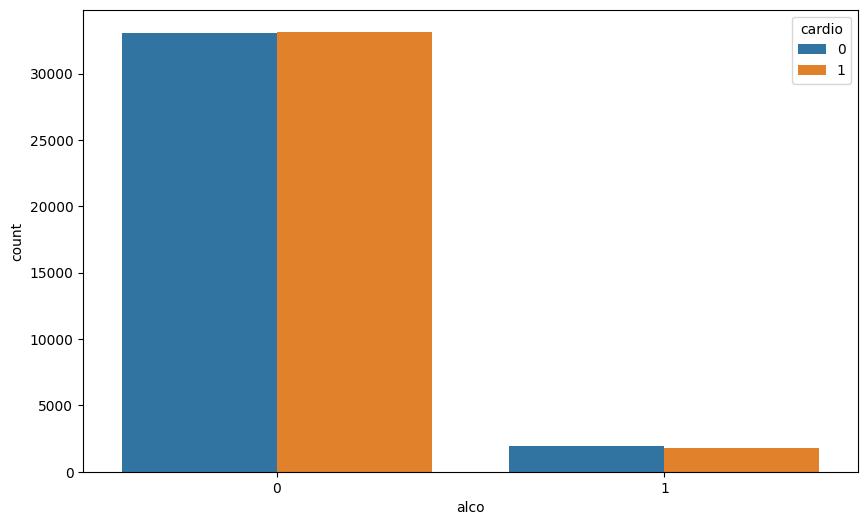

In [13]:
# count of non-alcoholics and alcoholics cardio patients

plt.figure(figsize=(10, 6))

sns.countplot(x='alco', hue='cardio', data=df)

<Axes: xlabel='active', ylabel='count'>

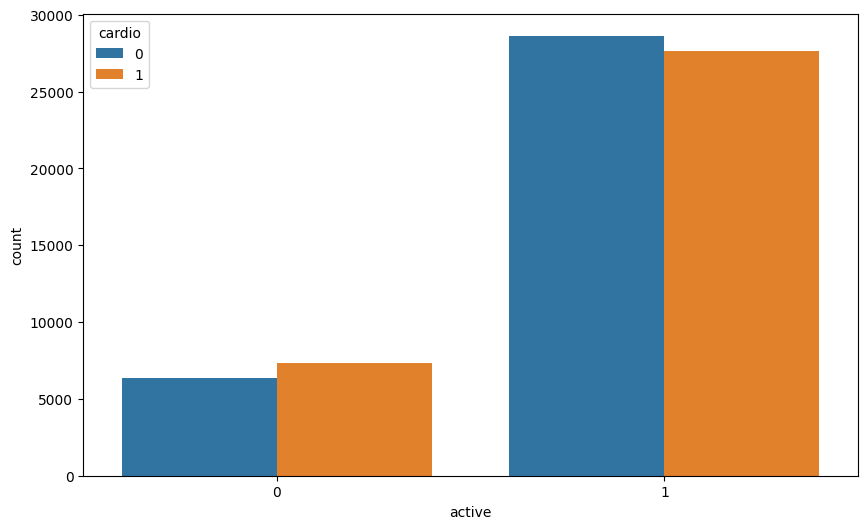

In [14]:
# count of physically active and inactive cardio patients

plt.figure(figsize=(10, 6))

sns.countplot(x='active', hue='cardio', data=df)


<Axes: xlabel='gluc', ylabel='count'>

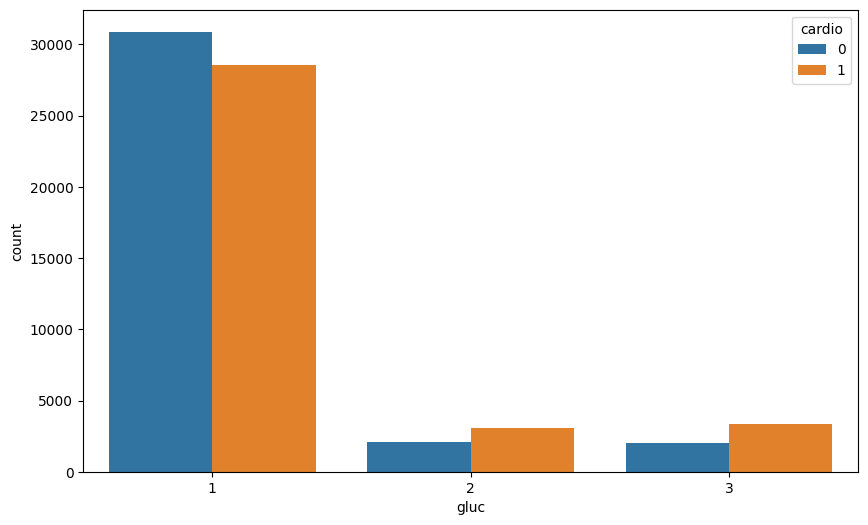

In [15]:
# count of Gluc0, Gluc1, Gluc2 cardio patients

# gluc: 1 - normal, 2 - above normal, 3 - well above normal

plt.figure(figsize=(10, 6))

sns.countplot(x='gluc', hue='cardio', data=df)

<Axes: xlabel='cholesterol', ylabel='count'>

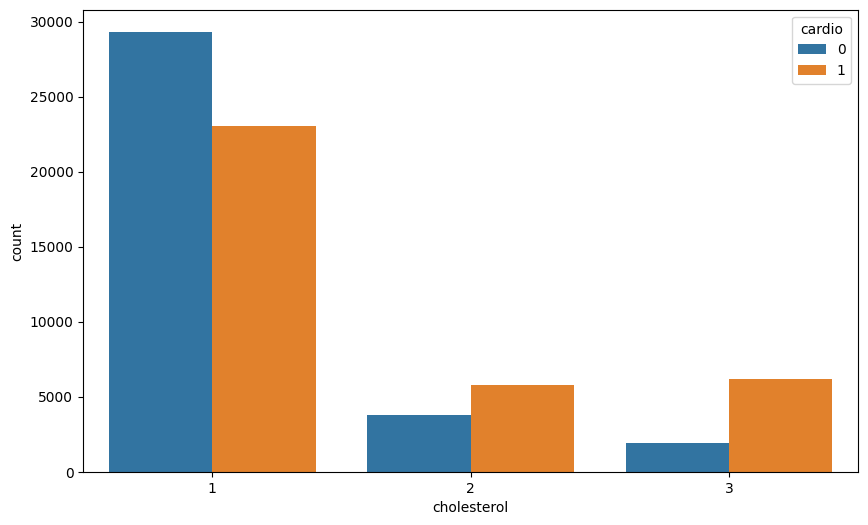

In [16]:
# count of Cholesterol cardio patiens

# cholesterol: 1 - normal, 2 - above normal, 3 - well above normal

plt.figure(figsize=(10, 6))

sns.countplot(x='cholesterol', hue='cardio', data=df)

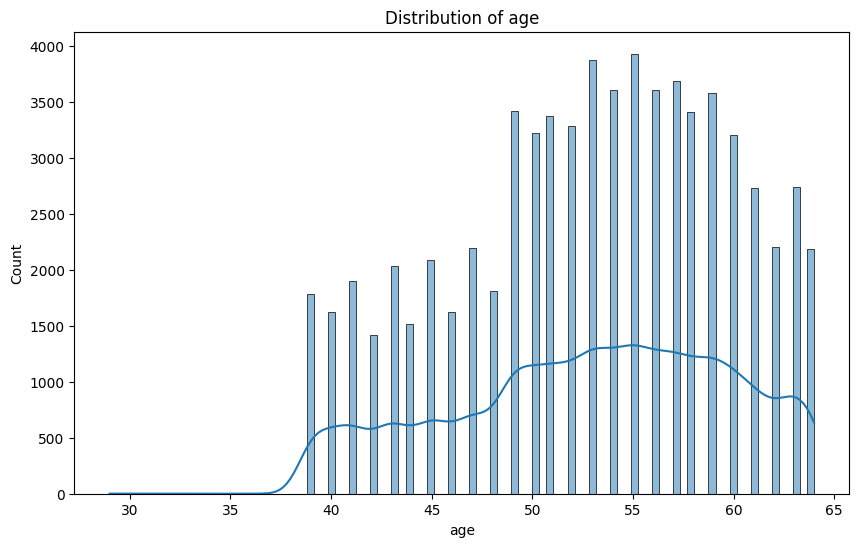

In [17]:
# plot distribution of age

plt.figure(figsize=(10, 6))

sns.histplot(df['age'], bins=100, kde=True)

plt.title('Distribution of age')

plt.show()

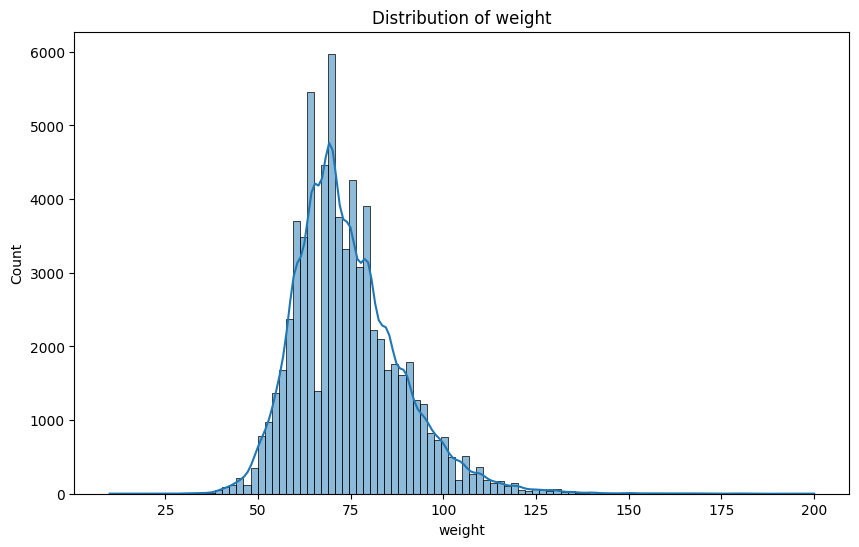

In [18]:
# plot distribution of weight

plt.figure(figsize=(10, 6))

sns.histplot(df['weight'], bins=100, kde=True)

plt.title('Distribution of weight')

plt.show()

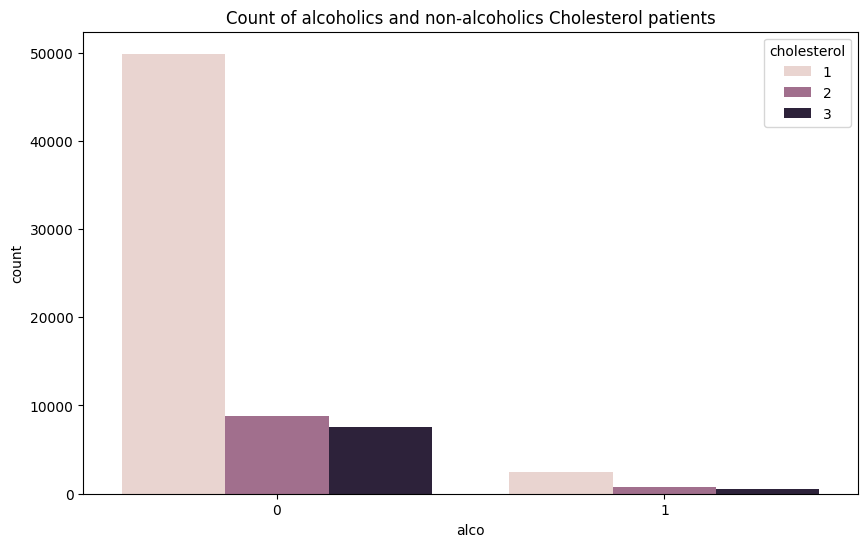

In [19]:
# conut of alcoholics and non-alcoholics Cholesterol patients

plt.figure(figsize=(10, 6))


sns.countplot(x='alco', hue='cholesterol', data=df)

plt.title('Count of alcoholics and non-alcoholics Cholesterol patients')

plt.show()

Text(0.5, 1.0, 'Count of alcoholics and non-alcoholics Gluc patients')

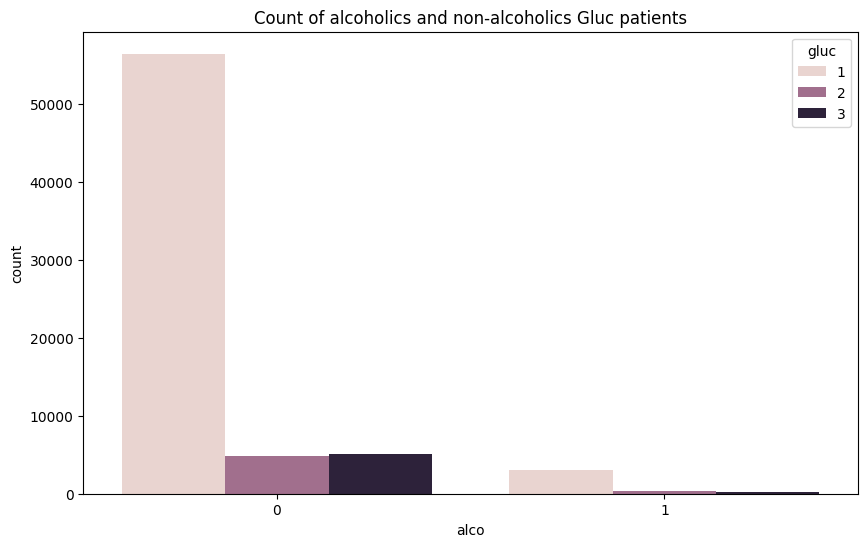

In [20]:
# conut of alcoholics and non-alcoholics Gluc patients

plt.figure(figsize=(10, 6))

sns.countplot(x='alco', hue='gluc', data=df)

plt.title('Count of alcoholics and non-alcoholics Gluc patients')

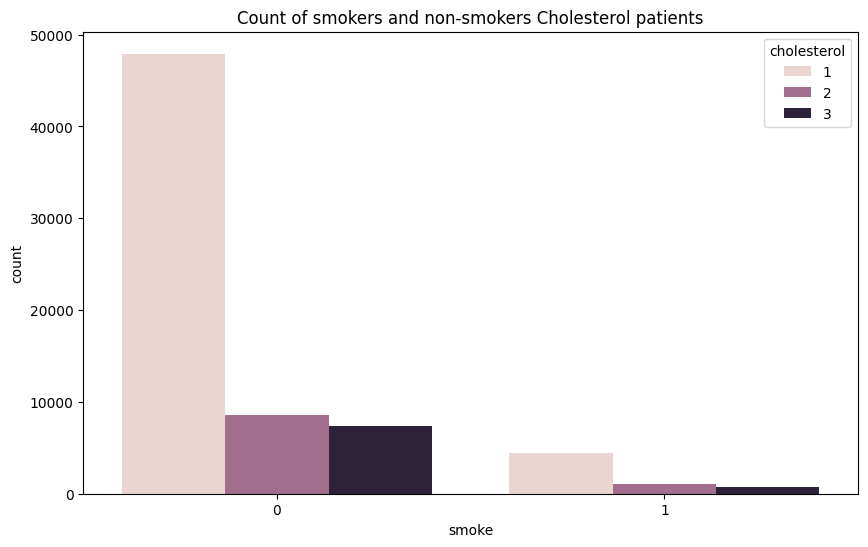

In [21]:
# count of smokers and non-smokers Cholesterol patients

plt.figure(figsize=(10, 6))

sns.countplot(x='smoke', hue='cholesterol', data=df)

plt.title('Count of smokers and non-smokers Cholesterol patients')

plt.show()

Text(0.5, 1.0, 'Count of smokers and non-smokers Gluc patients')

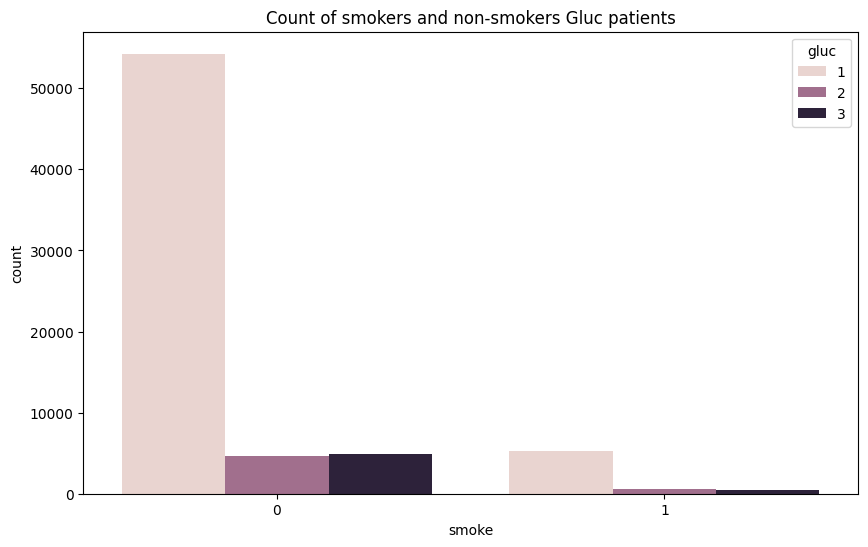

In [22]:
# count of smokers and non-smokers Gluc patients

plt.figure(figsize=(10, 6))

sns.countplot(x='smoke', hue='gluc', data=df)

plt.title('Count of smokers and non-smokers Gluc patients')

In [23]:
# group by blood pressure
# 1- Normal (sys <= 120 and dia <= 80)
# 2- at risk (120 < sys <= 140 or 80 < dia <= 90)
# 3- high (sys > 140 or dia > 90)

df['blood_pressure'] = 0

df.loc[(df['ap_hi'] <= 120) & (df['ap_lo'] <= 80), 'blood_pressure'] = 1

df.loc[((df['ap_hi'] > 120) & (df['ap_hi'] <= 140)) | ((df['ap_lo'] > 80) & (df['ap_lo'] <= 90)), 'blood_pressure'] = 2

df.loc[(df['ap_hi'] > 140) | (df['ap_lo'] > 90), 'blood_pressure'] = 3

df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,1
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,2
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,2
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,1


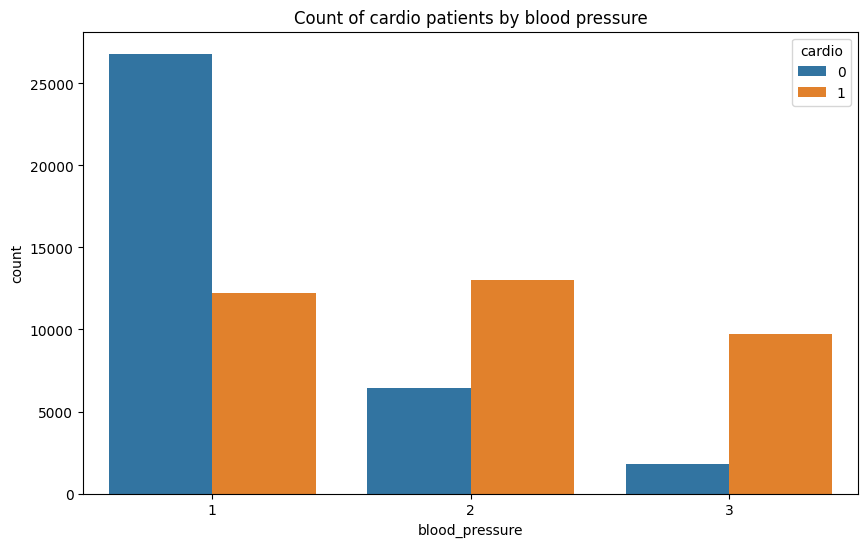

In [24]:
# check count of cardio patients by blood pressure

plt.figure(figsize=(10, 6))

sns.countplot(x='blood_pressure', hue='cardio', data=df)

plt.title('Count of cardio patients by blood pressure')

plt.show()

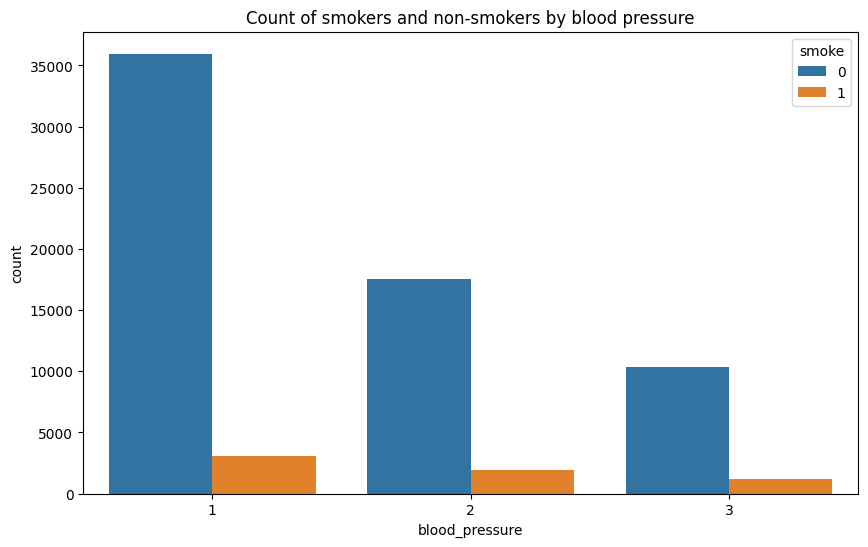

In [25]:
# check count of smokers and non-smokers by blood pressure

plt.figure(figsize=(10, 6))

sns.countplot(x='blood_pressure', hue='smoke', data=df)

plt.title('Count of smokers and non-smokers by blood pressure')

plt.show()

Text(0.5, 1.0, 'Count of alcoholics and non-alcoholics by blood pressure')

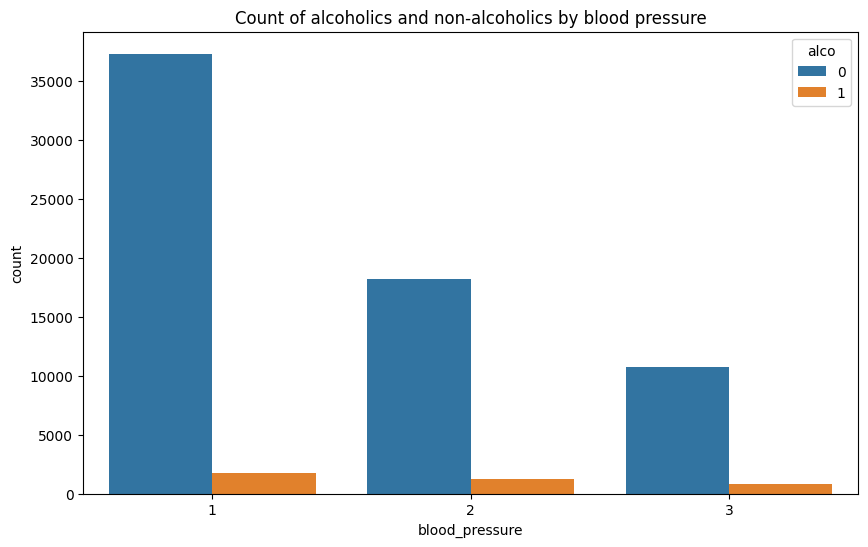

In [26]:
# check count of alcoholics and non-alcoholics by blood pressure

plt.figure(figsize=(10, 6))

sns.countplot(x='blood_pressure', hue='alco', data=df)

plt.title('Count of alcoholics and non-alcoholics by blood pressure')

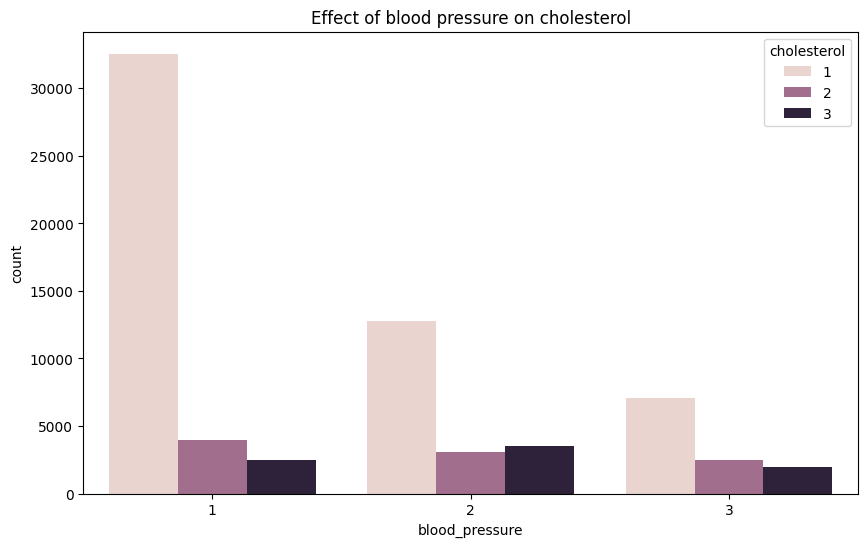

In [27]:
# check effect of blood pressure on cholesterol

plt.figure(figsize=(10, 6))

sns.countplot(x='blood_pressure', hue='cholesterol', data=df)

plt.title('Effect of blood pressure on cholesterol')

plt.show()

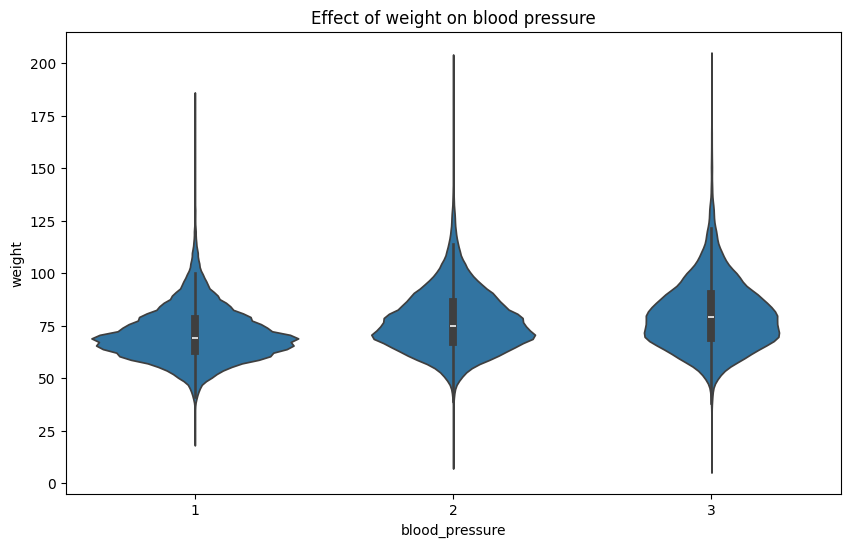

In [28]:
# check effect of weight on blood pressure

plt.figure(figsize=(10, 6))

sns.violinplot(x='blood_pressure', y='weight', data=df)

plt.title('Effect of weight on blood pressure')

plt.show()

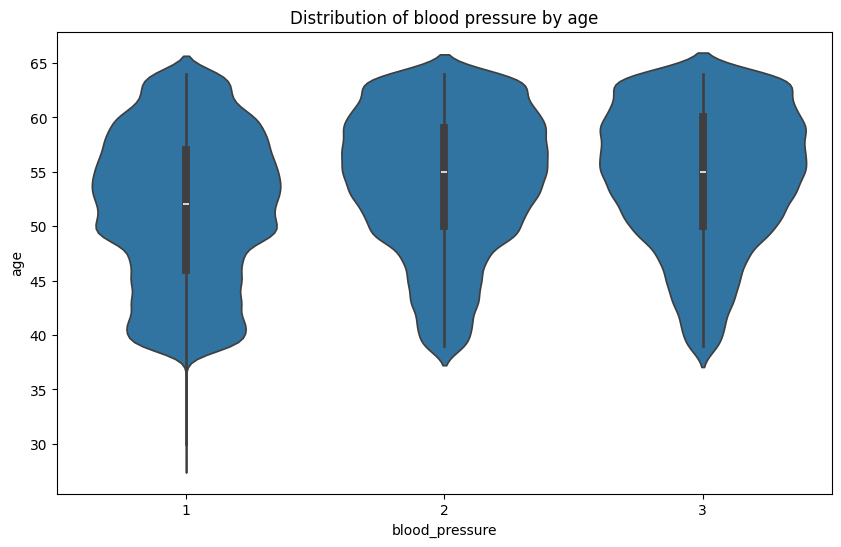

In [29]:
# distribution of blood pressure by age

plt.figure(figsize=(10, 6))

sns.violinplot(x='blood_pressure', y='age', data=df)

plt.title('Distribution of blood pressure by age')

plt.show()

In [30]:
# calculate BMI

df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,1,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,2,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,2,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,1,23.011177


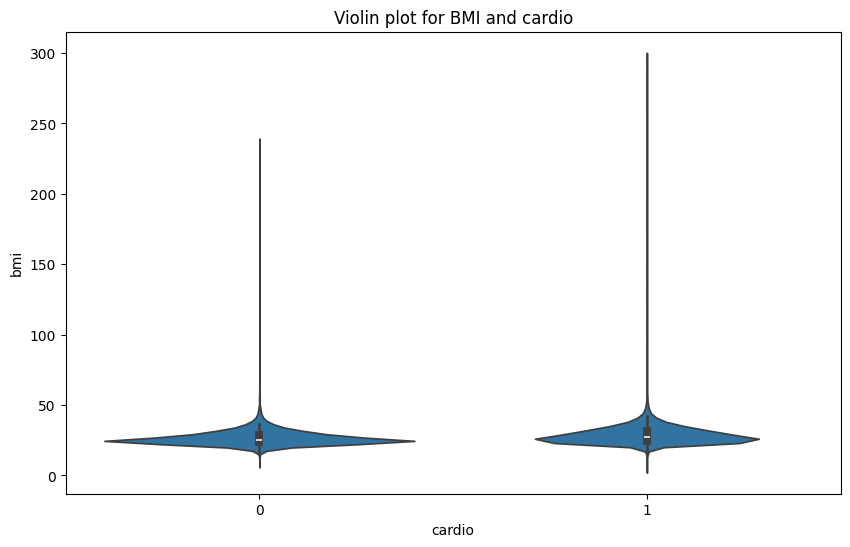

In [31]:
# violin plot for BMI and cardio

plt.figure(figsize=(10, 6))

sns.violinplot(x='cardio', y='bmi', data=df)

plt.title('Violin plot for BMI and cardio')

plt.show()

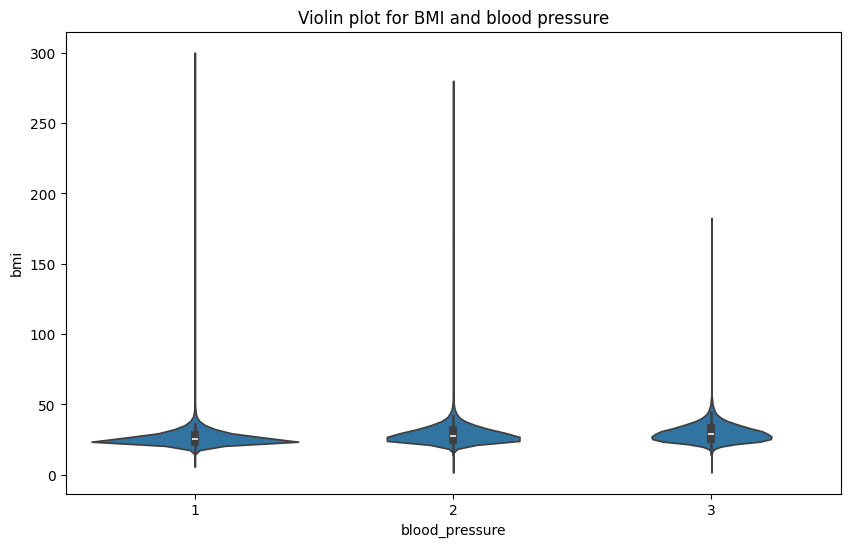

In [32]:
# violin plot for BMI and blood pressure

plt.figure(figsize=(10, 6))

sns.violinplot(x='blood_pressure', y='bmi', data=df)

plt.title('Violin plot for BMI and blood pressure')

plt.show()

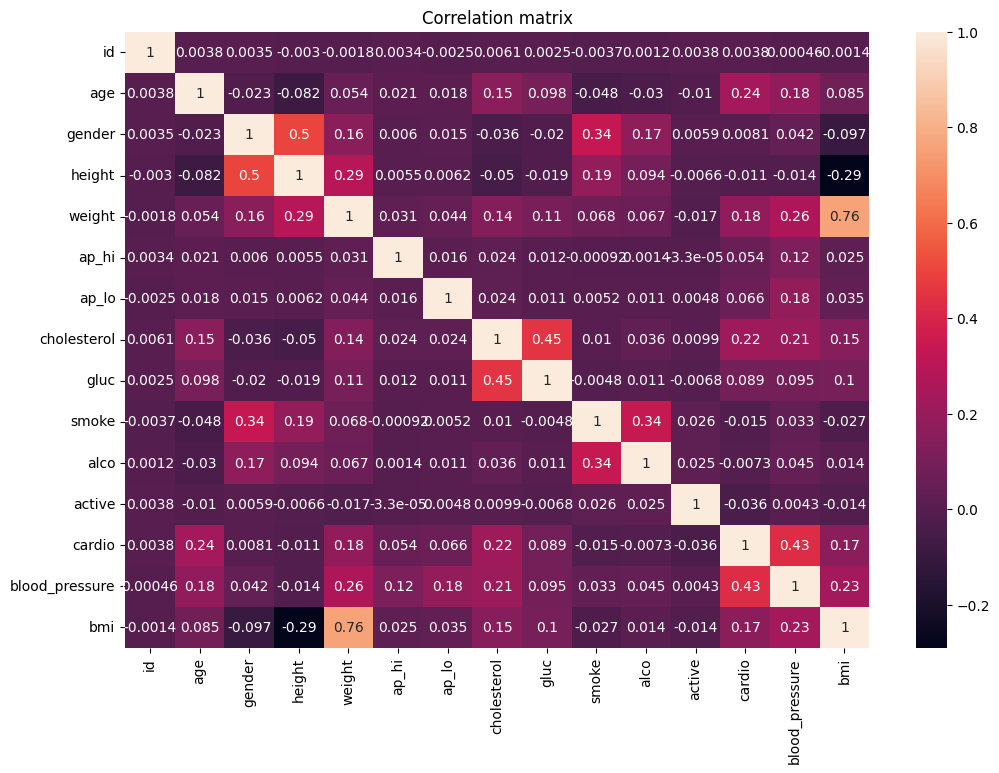

In [33]:
# correlation matrix

plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True)

plt.title('Correlation matrix')

plt.show()

In [34]:
df.fillna(df.median(), inplace=True)
df = df.drop(columns=['id'],axis=1)

# Extract features (all columns except 'cardio') and target variable ('cardio')
X = df.drop(columns=['cardio'],axis=1)
y = df['cardio']

columns_to_standardize = ['age', 'height','weight','ap_hi','ap_lo','bmi']


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train[columns_to_standardize] = scaler.fit_transform(X_train[columns_to_standardize])
X_test[columns_to_standardize] = scaler.fit_transform(X_test[columns_to_standardize])
X_val[columns_to_standardize] = scaler.fit_transform(X_val[columns_to_standardize])

In [35]:
# Create the Fitness and Individual classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
def evaluate(individual):
    # Ensure the number of hidden layers is an integer
    num_hidden_layers = int(individual[-3])
  
    # Extract the sizes of the hidden layers based on the number of hidden layers
    hidden_layers = tuple(individual[:num_hidden_layers])
  
    # Extract other hyperparameters
    activation = ['identity', 'logistic', 'tanh', 'relu'][individual[-2]]
    solver = 'adam'
    alpha = individual[-1]
    # Initialize the MLPClassifier with the hyperparameters
    model = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation,
                          solver=solver, alpha=alpha, max_iter= 1000, random_state=42)
  
    # Train the model
    model.fit(X_train, y_train)
  
     # Predict on the validation set
    y_pred = model.predict(X_val)
   
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
   
     # Return the fitness score (accuracy)
    return accuracy,

 # Define the genetic algorithm components
toolbox = base.Toolbox()
# Define individual components: up to 6 hidden layers, activation, solver, and alpha
toolbox.register("attr_hidden_layer_size", random.randint, 10, 200)
toolbox.register("attr_num_hidden_layers", random.randint, 1, 10)  # 1 to 10 hidden layers
toolbox.register("attr_activation", random.randint, 0, 3)
toolbox.register("attr_alpha", random.uniform, 0.0001, 0.01)
# Define the individual and population
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_hidden_layer_size,
                  toolbox.attr_hidden_layer_size,
                  toolbox.attr_hidden_layer_size,
                  toolbox.attr_hidden_layer_size,
                  toolbox.attr_hidden_layer_size,
                  toolbox.attr_hidden_layer_size,
                  toolbox.attr_hidden_layer_size,
                  toolbox.attr_hidden_layer_size,
                  toolbox.attr_hidden_layer_size,
                  toolbox.attr_hidden_layer_size,
                  toolbox.attr_num_hidden_layers,
                  toolbox.attr_activation,
                  toolbox.attr_alpha), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate",tools.cxTwoPoint)
# Update mutation function to ensure valid hidden layer sizes
toolbox.register("mutate", tools.mutUniformInt, 
                 low=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0.0001],  # Ensure minimum size of 1 for hidden layers
                 up=[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 10, 3, 2, 0.01], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Main function to run the genetic algorithm
def main():
    random.seed(42)
  
    # Initialize population
    population = toolbox.population(n=20)
  
    # Apply the genetic algorithm
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=20, verbose=True)
  
    # Get the best individual
    best_individual = tools.selBest(population, k=1)[0]
    print("Best individual is:", best_individual)
    print("Best validation accuracy is:", evaluate(best_individual)[0])

main()